# Approximating the Integral
This notebook is a playground to explore this idea of chopping up a function into rectangles to approximate its integral.

After this (in the next notebook) you will actually integrate the elevator accelerometer data you saw before.

## Part 1 - Visualizing Rectangles

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
def show_approximate_integral(f, t_min, t_max, N):
    t = np.linspace(t_min, t_max)
    plt.plot(t, f(t))
    
    delta_t = (t_max - t_min) / N
    
    print("Approximating integral for delta_t =",delta_t, "seconds")
    box_t = np.linspace(t_min, t_max, N, endpoint=False)
    box_f_of_t = f(box_t)
    plt.bar(box_t, box_f_of_t,
            width=delta_t,
            alpha=0.5,
            facecolor="orange",
            align="edge",
            edgecolor="gray")
    plt.show()

In [3]:
def f1(t):
    return -1.3 * t**3 + 5.3 * t ** 2 + 0.3 * t + 1 

Approximating integral for delta_t = 2.0 seconds


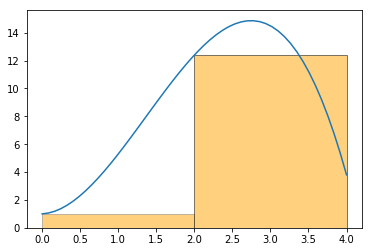

Approximating integral for delta_t = 1.3333333333333333 seconds


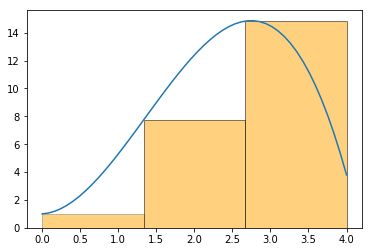

Approximating integral for delta_t = 1.0 seconds


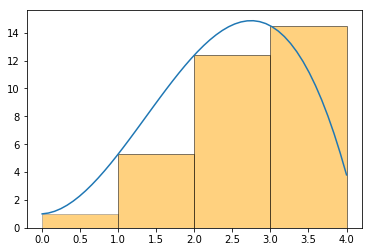

Approximating integral for delta_t = 0.8 seconds


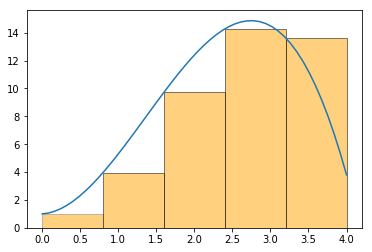

Approximating integral for delta_t = 0.6666666666666666 seconds


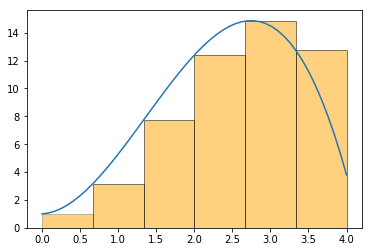

Approximating integral for delta_t = 0.5714285714285714 seconds


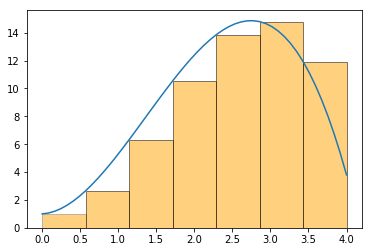

In [4]:
# TODO - increase N from 2 to 4 to 8 etc... and run
#        this cell each time. Notice how the bars 
#        get closer and closer to approximating 
#        the true area under the curve.

for N in range(2, 8):
    show_approximate_integral(f1,0,4,N)

Approximating integral for delta_t = 0.08 seconds


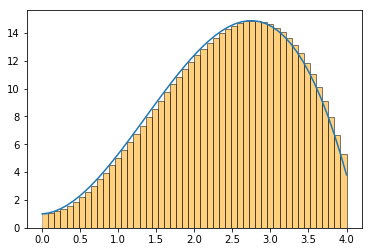

In [5]:
# When N is big, the approximation is PRETTY
# close to reality.

N = 50
show_approximate_integral(f1, 0, 4, N)

## Part 2 - Approximating Integrals

In this section, you will solve some integration "homework problems".

These are problems that you would see in a typical calculus textbook (and would be expected to solve **exactly** using clever integration techniques)

First, let's take a look at the function you'll be using to perform these approximations!

In [6]:
def integral(f, t1, t2, dt=0.1):
    # area begins at 0.0 
    area = 0.0
    
    # t starts at the lower bound of integration
    t = t1
    
    # integration continues until we reach upper bound
    while t < t2:
        
        # calculate the TINY bit of area associated with
        # this particular rectangle and add to total
        dA = f(t) * dt
        area += dA
        t += dt
    return area

I'll work through the first example for you.
#### Homework 1 - Example

Compute the following integral:

$$\int_{2}^{4}t^2dt$$

**EXPECTED ANSWER: 18.66**

In [7]:
# solution step 1: define the function to be integrated

def f1(t):
    return t**2

In [8]:
# solution step 2: try to solve it...
integral(f1, 2, 4)

18.07000000000001

that's pretty close, but I'd like more accuracy. Let's decrease dt from the default value of 0.1...

In [9]:
integral(f1,2,4,0.01)

18.766699999999705

In [10]:
integral(f1,2,4,0.001)

18.67666699999851

In [11]:
integral(f1,2,4, 0.0001)

18.666066670028115

Nice! We should probably use this value for dt in future calculations. Before we continue, let's just visualize this integral.

Approximating integral for delta_t = 0.1 seconds


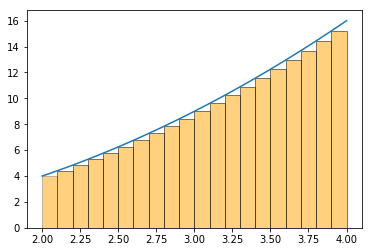

In [12]:
show_approximate_integral(f1,2,4,20)

#### Homework 2

Compute the following integral

$$\int_{-2}^2 3t^3 - 4t dt$$

In [ ]:
# Your code here



#### Homework 3 (this one can be tricky)
Compute the following integral

$$\int_3^{7} \frac{1}{\sqrt{2\pi\times0.2}} e^{-\frac{(t-5)^2}{2 \times 0.2}}dt$$

In [ ]:
# Your code here



-----
SOLUTIONS



In [13]:
# Solution 2
def f2(t):
    return 3 * t**3 - 4*t

integral(f2, -2, 2, 0.0001)

-6.485876072326313e-12

This number ends with "e-12", which means $\times 10 ^ {-12}$

That means that this integral is 0.00000000000648 (basically zero). This shouldn't be surprising since we integrated symmetrically across an odd function (all the exponents on the t's were odd).

This means that for any positive contribution on one side of zero, there's a negative contribution to the total area on the other side of zero.

Approximating integral for delta_t = 0.1 seconds


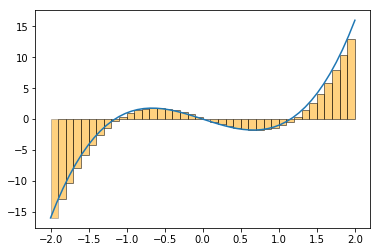

In [14]:
show_approximate_integral(f2, -2,2,40)

In [15]:
# Solution 3

from math import sqrt, pi

def f3(t):
    coeff    = 1.0 / sqrt(2 * pi * 0.2)
    exponent = -(t-5)**2 / (2*0.2)
    return coeff * np.exp(exponent)

integral(f3, 3, 7, 0.001)

0.99999225571574024

That's pretty close to 1! That's because the function I just had you integrate was a Gaussian probability distribution. 

Approximating integral for delta_t = 0.08 seconds


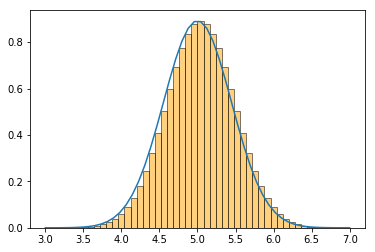

In [16]:
show_approximate_integral(f3, 3, 7, 50)